In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family='serif', serif='Times')
plt.rc('text', usetex=True)
plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.facecolor'] = 'white'
def get_heatmap_from_lexicon3(lexicon, file=None, reindex_df=None, indices=None, columns=None, title="", ax=None):
    if columns is not None:
        lexicon = lexicon[columns]
    if indices is not None:
        lexicon = lexicon.loc[indices]
    lexicon = lexicon.rename(columns=lambda x: x.replace("I_","I").replace("TURN_",""))
    if reindex_df is not None:
        lexicon =lexicon.reindex(index=reindex_df.index, columns=reindex_df.columns, fill_value=0)
    heatmap = sns.heatmap(lexicon, cbar=False,cmap='gist_gray', ax=ax, xticklabels=True, yticklabels=True)
    plt.tight_layout()
    if ax is not None:
        ax.set_title(title)
        ax.tick_params(axis='y', rotation=0)
        ax.tick_params(axis='x', rotation=30)
        
        
    if file is not None:
        heatmap.get_figure().savefig(file)
    return lexicon, heatmap

In [110]:
import numpy as np

def load_lexicon(lex_file):
    lexicon = np.load(lex_file)
    # remove special fairseq tokens 
    lexicon = lexicon[4:, 4:]
    return lexicon

es_en_lexicon_l50_t01   = load_lexicon('/data/sls/temp/clai24/data/speech_matrix/speech_to_unit/lexicon_alignment/es-en/diag.align.filter50_u2u_probt0.1.npy')
es_en_lexicon_l250_t01  = load_lexicon('/data/sls/temp/clai24/data/speech_matrix/speech_to_unit/lexicon_alignment/es-en/diag.align.filter250_u2u_probt0.1.npy')
es_en_lexicon_l400_t01  = load_lexicon('/data/sls/temp/clai24/data/speech_matrix/speech_to_unit/lexicon_alignment/es-en/diag.align.filter400_u2u_probt0.1.npy')
es_en_lexicon_l500_t01  = load_lexicon('/data/sls/temp/clai24/data/speech_matrix/speech_to_unit/lexicon_alignment/es-en/diag.align.filter500_u2u_probt0.1.npy')
es_en_lexicon_l1024_t01 = load_lexicon('/data/sls/temp/clai24/data/speech_matrix/speech_to_unit/lexicon_alignment/es-en/diag.align.filter1024_u2u_probt0.1.npy')

es_en_lexicon_l50_t100   = load_lexicon('/data/sls/temp/clai24/data/speech_matrix/speech_to_unit/lexicon_alignment/es-en/diag.align.filter50_u2u_probt10.0.npy')
es_en_lexicon_l250_t100  = load_lexicon('/data/sls/temp/clai24/data/speech_matrix/speech_to_unit/lexicon_alignment/es-en/diag.align.filter250_u2u_probt10.0.npy')
es_en_lexicon_l400_t100  = load_lexicon('/data/sls/temp/clai24/data/speech_matrix/speech_to_unit/lexicon_alignment/es-en/diag.align.filter400_u2u_probt10.0.npy')
es_en_lexicon_l500_t100  = load_lexicon('/data/sls/temp/clai24/data/speech_matrix/speech_to_unit/lexicon_alignment/es-en/diag.align.filter500_u2u_probt10.0.npy')
es_en_lexicon_l1024_t100 = load_lexicon('/data/sls/temp/clai24/data/speech_matrix/speech_to_unit/lexicon_alignment/es-en/diag.align.filter1024_u2u_probt10.0.npy')

ro_en_lexicon_l50_t01    = load_lexicon('/data/sls/temp/clai24/data/speech_matrix/speech_to_unit/lexicon_alignment/ro-en/diag.align.filter50_u2u_probt0.1.npy')
ro_en_lexicon_l250_t01   = load_lexicon('/data/sls/temp/clai24/data/speech_matrix/speech_to_unit/lexicon_alignment/ro-en/diag.align.filter250_u2u_probt0.1.npy')
ro_en_lexicon_l400_t01   = load_lexicon('/data/sls/temp/clai24/data/speech_matrix/speech_to_unit/lexicon_alignment/ro-en/diag.align.filter400_u2u_probt0.1.npy')
ro_en_lexicon_l500_t01   = load_lexicon('/data/sls/temp/clai24/data/speech_matrix/speech_to_unit/lexicon_alignment/ro-en/diag.align.filter500_u2u_probt0.1.npy')
ro_en_lexicon_l1024_t01  = load_lexicon('/data/sls/temp/clai24/data/speech_matrix/speech_to_unit/lexicon_alignment/ro-en/diag.align.filter1024_u2u_probt0.1.npy')


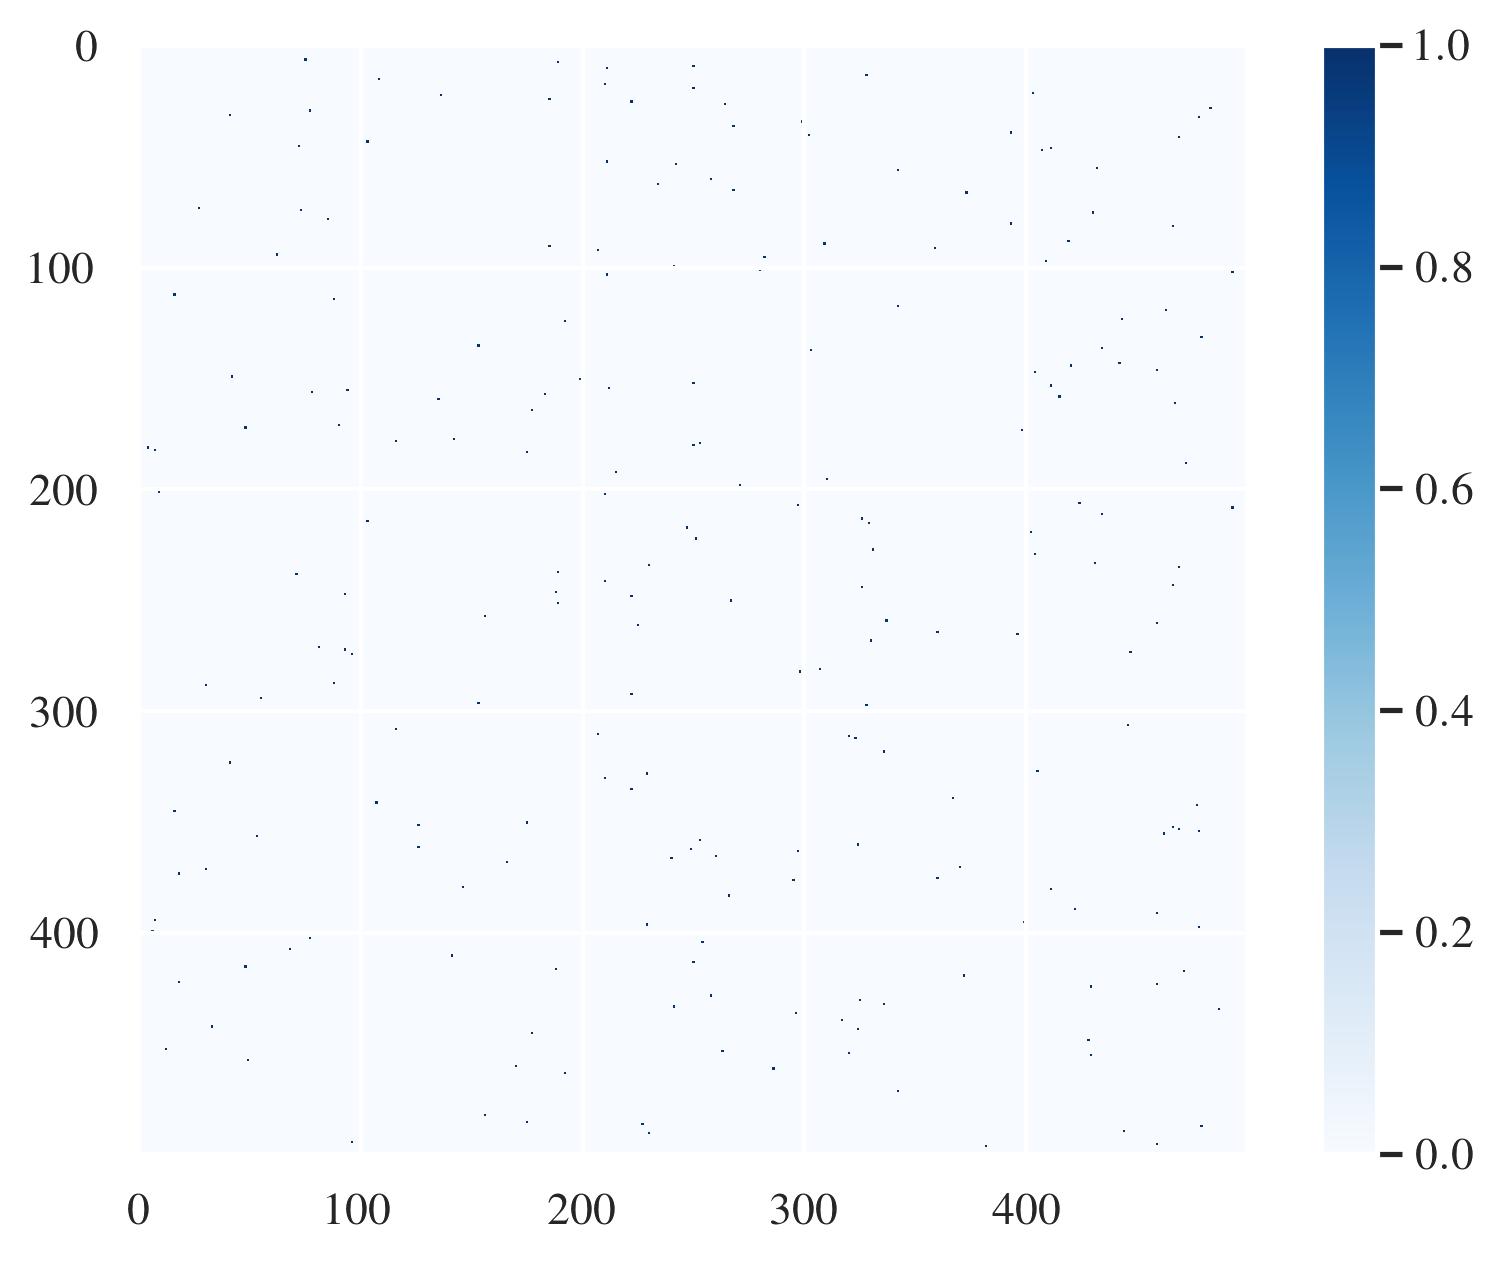

In [119]:
def viz_single_lexicon(lexicon):
    plt.imshow(lexicon, cmap='Blues', interpolation='nearest')
    plt.colorbar()
    plt.show()

# viz_single_lexicon(ro_en_lexicon_l50_t01[:200, :200])
viz_single_lexicon(ro_en_lexicon_l1024_t01[:500, :500])

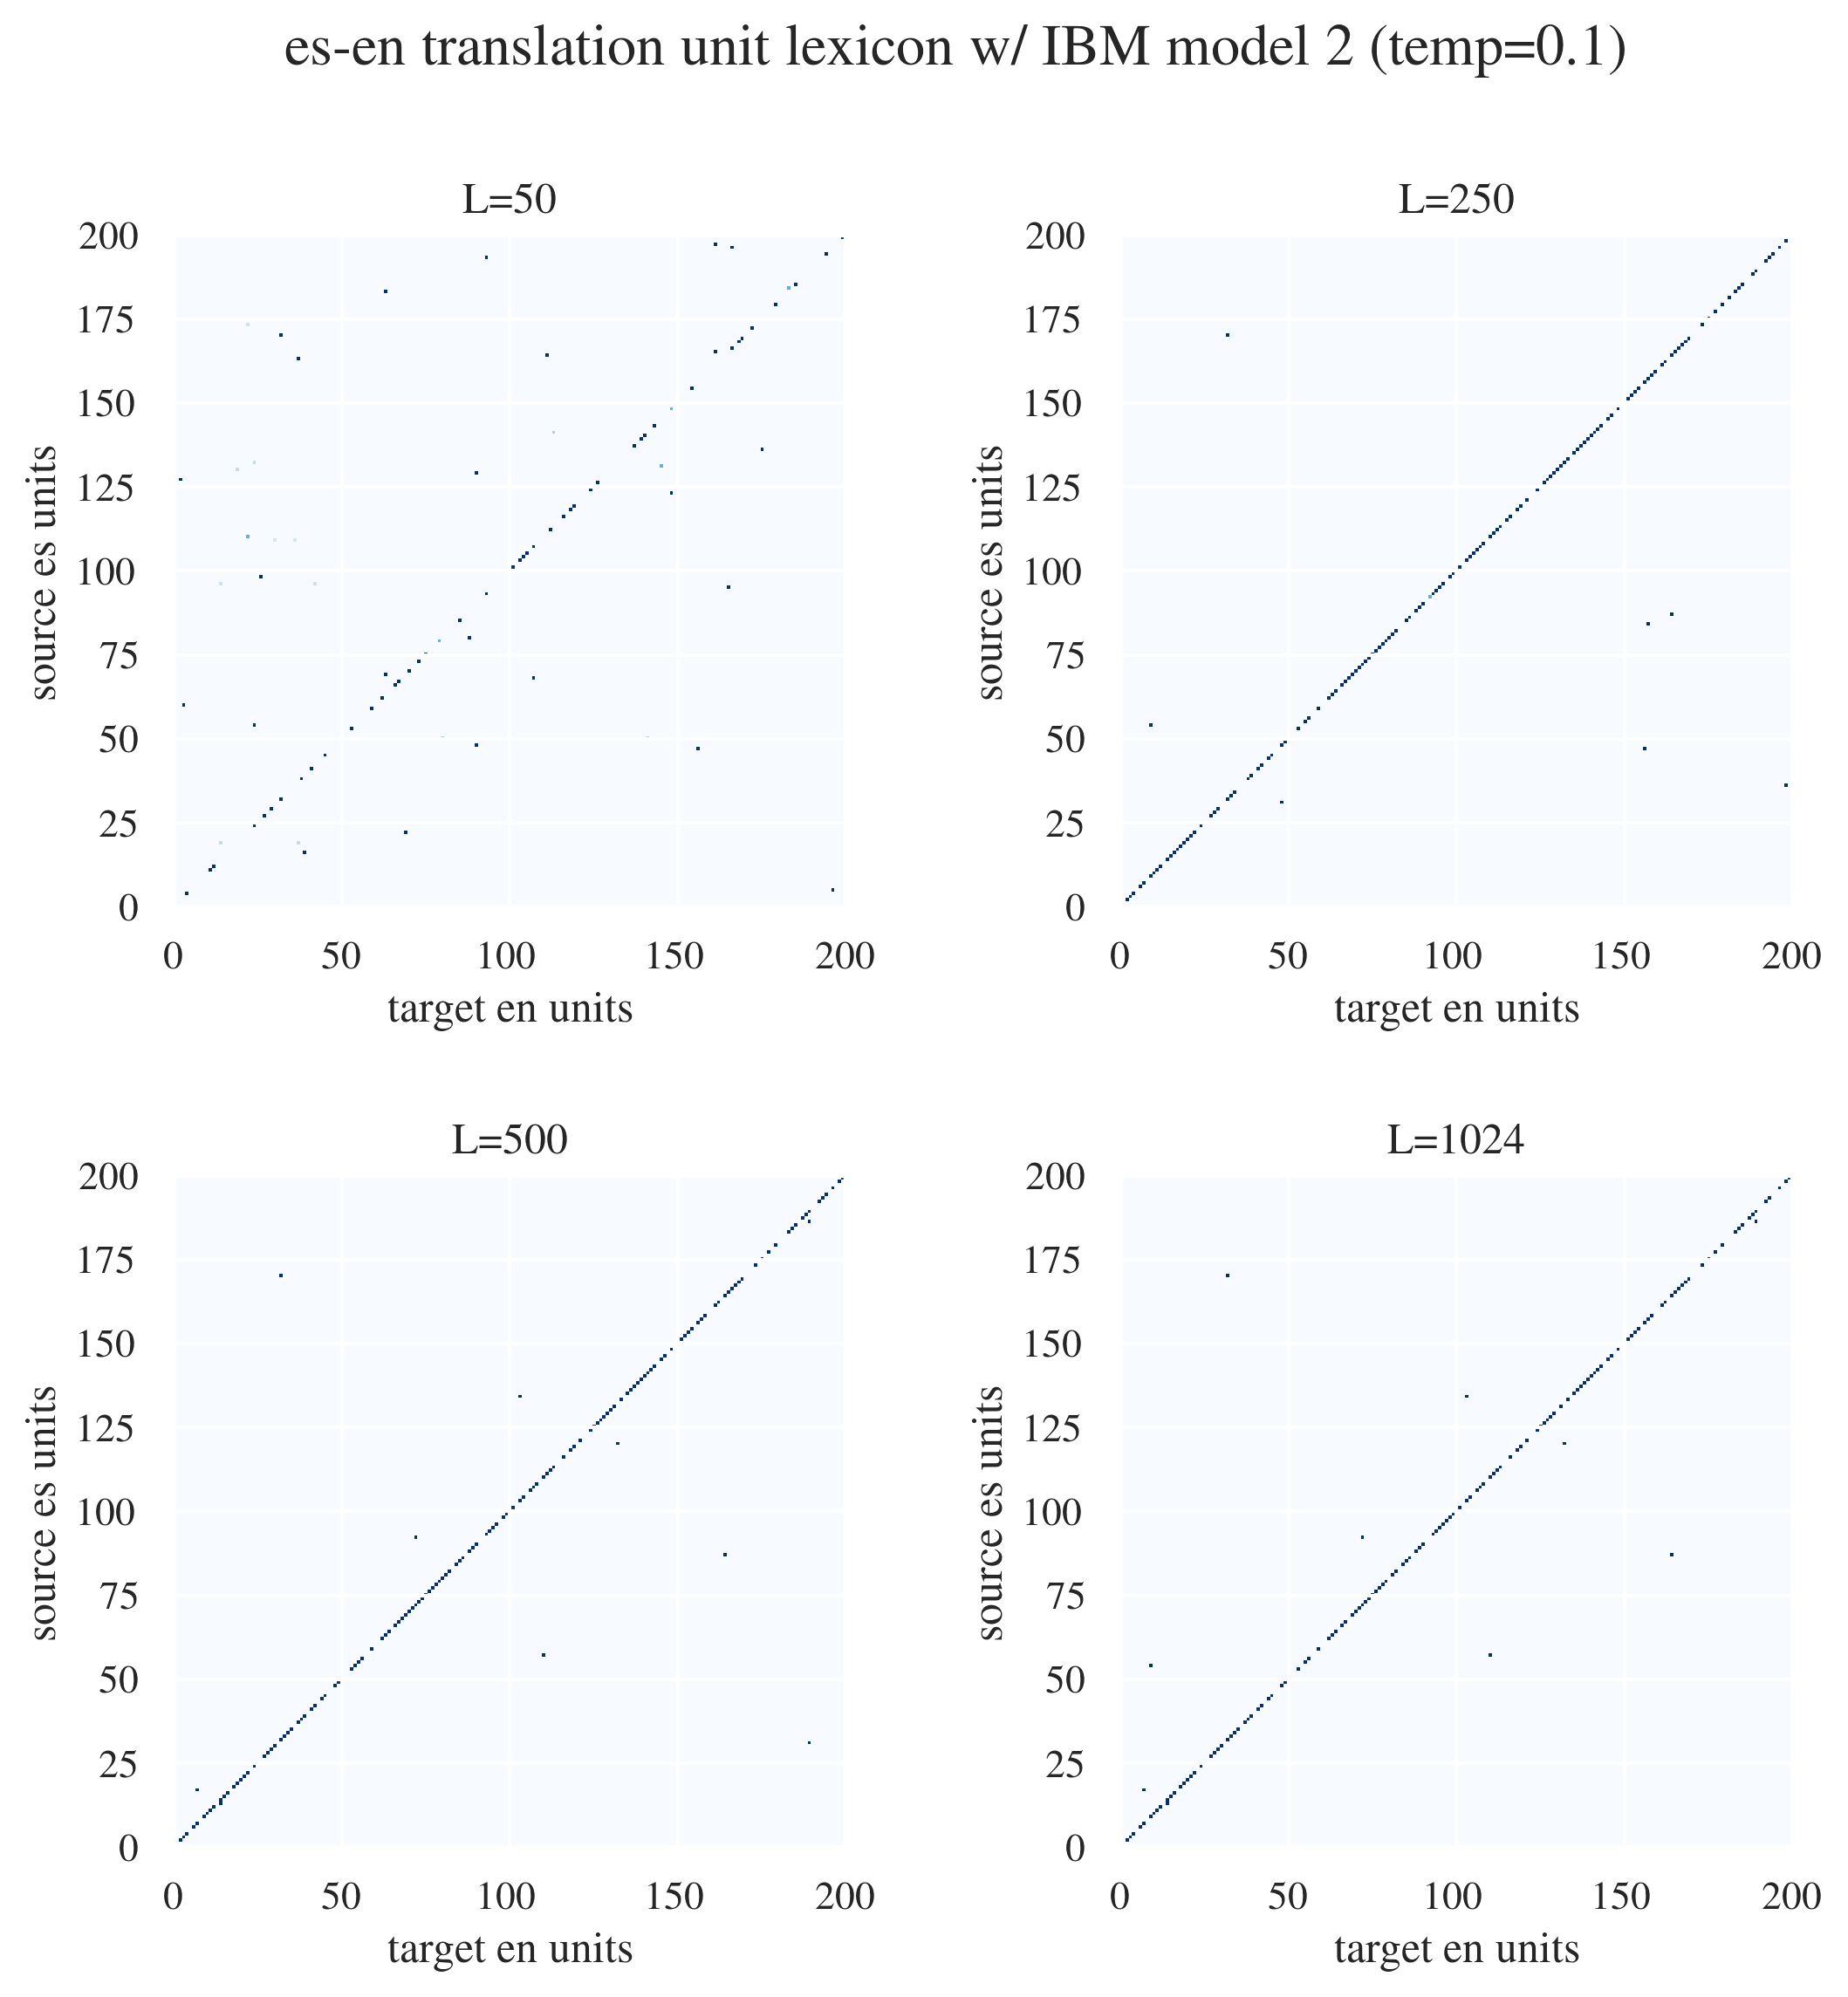

In [114]:
# threshold the lexicon 
start = 0
end = 200

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))

# Plot each array in a different subplot
axs[0, 0].imshow(es_en_lexicon_l50_t01[start:end, start:end], cmap='Blues', interpolation='nearest')
axs[0, 1].imshow(es_en_lexicon_l250_t01[start:end, start:end], cmap='Blues', interpolation='nearest')
axs[1, 0].imshow(es_en_lexicon_l500_t01[start:end, start:end], cmap='Blues', interpolation='nearest')
axs[1, 1].imshow(es_en_lexicon_l1024_t01[start:end, start:end], cmap='Blues', interpolation='nearest')

# Add a colorbar to each subplot
axs[0, 0].set_title("L=50")
axs[0, 1].set_title("L=250")
axs[1, 0].set_title("L=500")
axs[1, 1].set_title("L=1024")

# Set x and y axis labels and limits for each subplot
for ax in axs.flat:
    ax.set_xlabel('target en units')
    ax.set_ylabel('source es units')
    ax.set_xlim(start, end)
    ax.set_ylim(start, end)
    
# Add a general title to the entire figure
fig.suptitle("es-en translation unit lexicon w/ IBM model 2 (temp=0.1)", fontsize=16)

# Adjust the spacing between the subplots
fig.subplots_adjust(wspace=0.4, hspace=0.4)

# Show the plot
plt.show()

fig.savefig("/data/sls/scratch/clai24/lexicon/exp/ibm2_lexicon_alignment/viz/es-en/ibm_model2_t0.1.png")

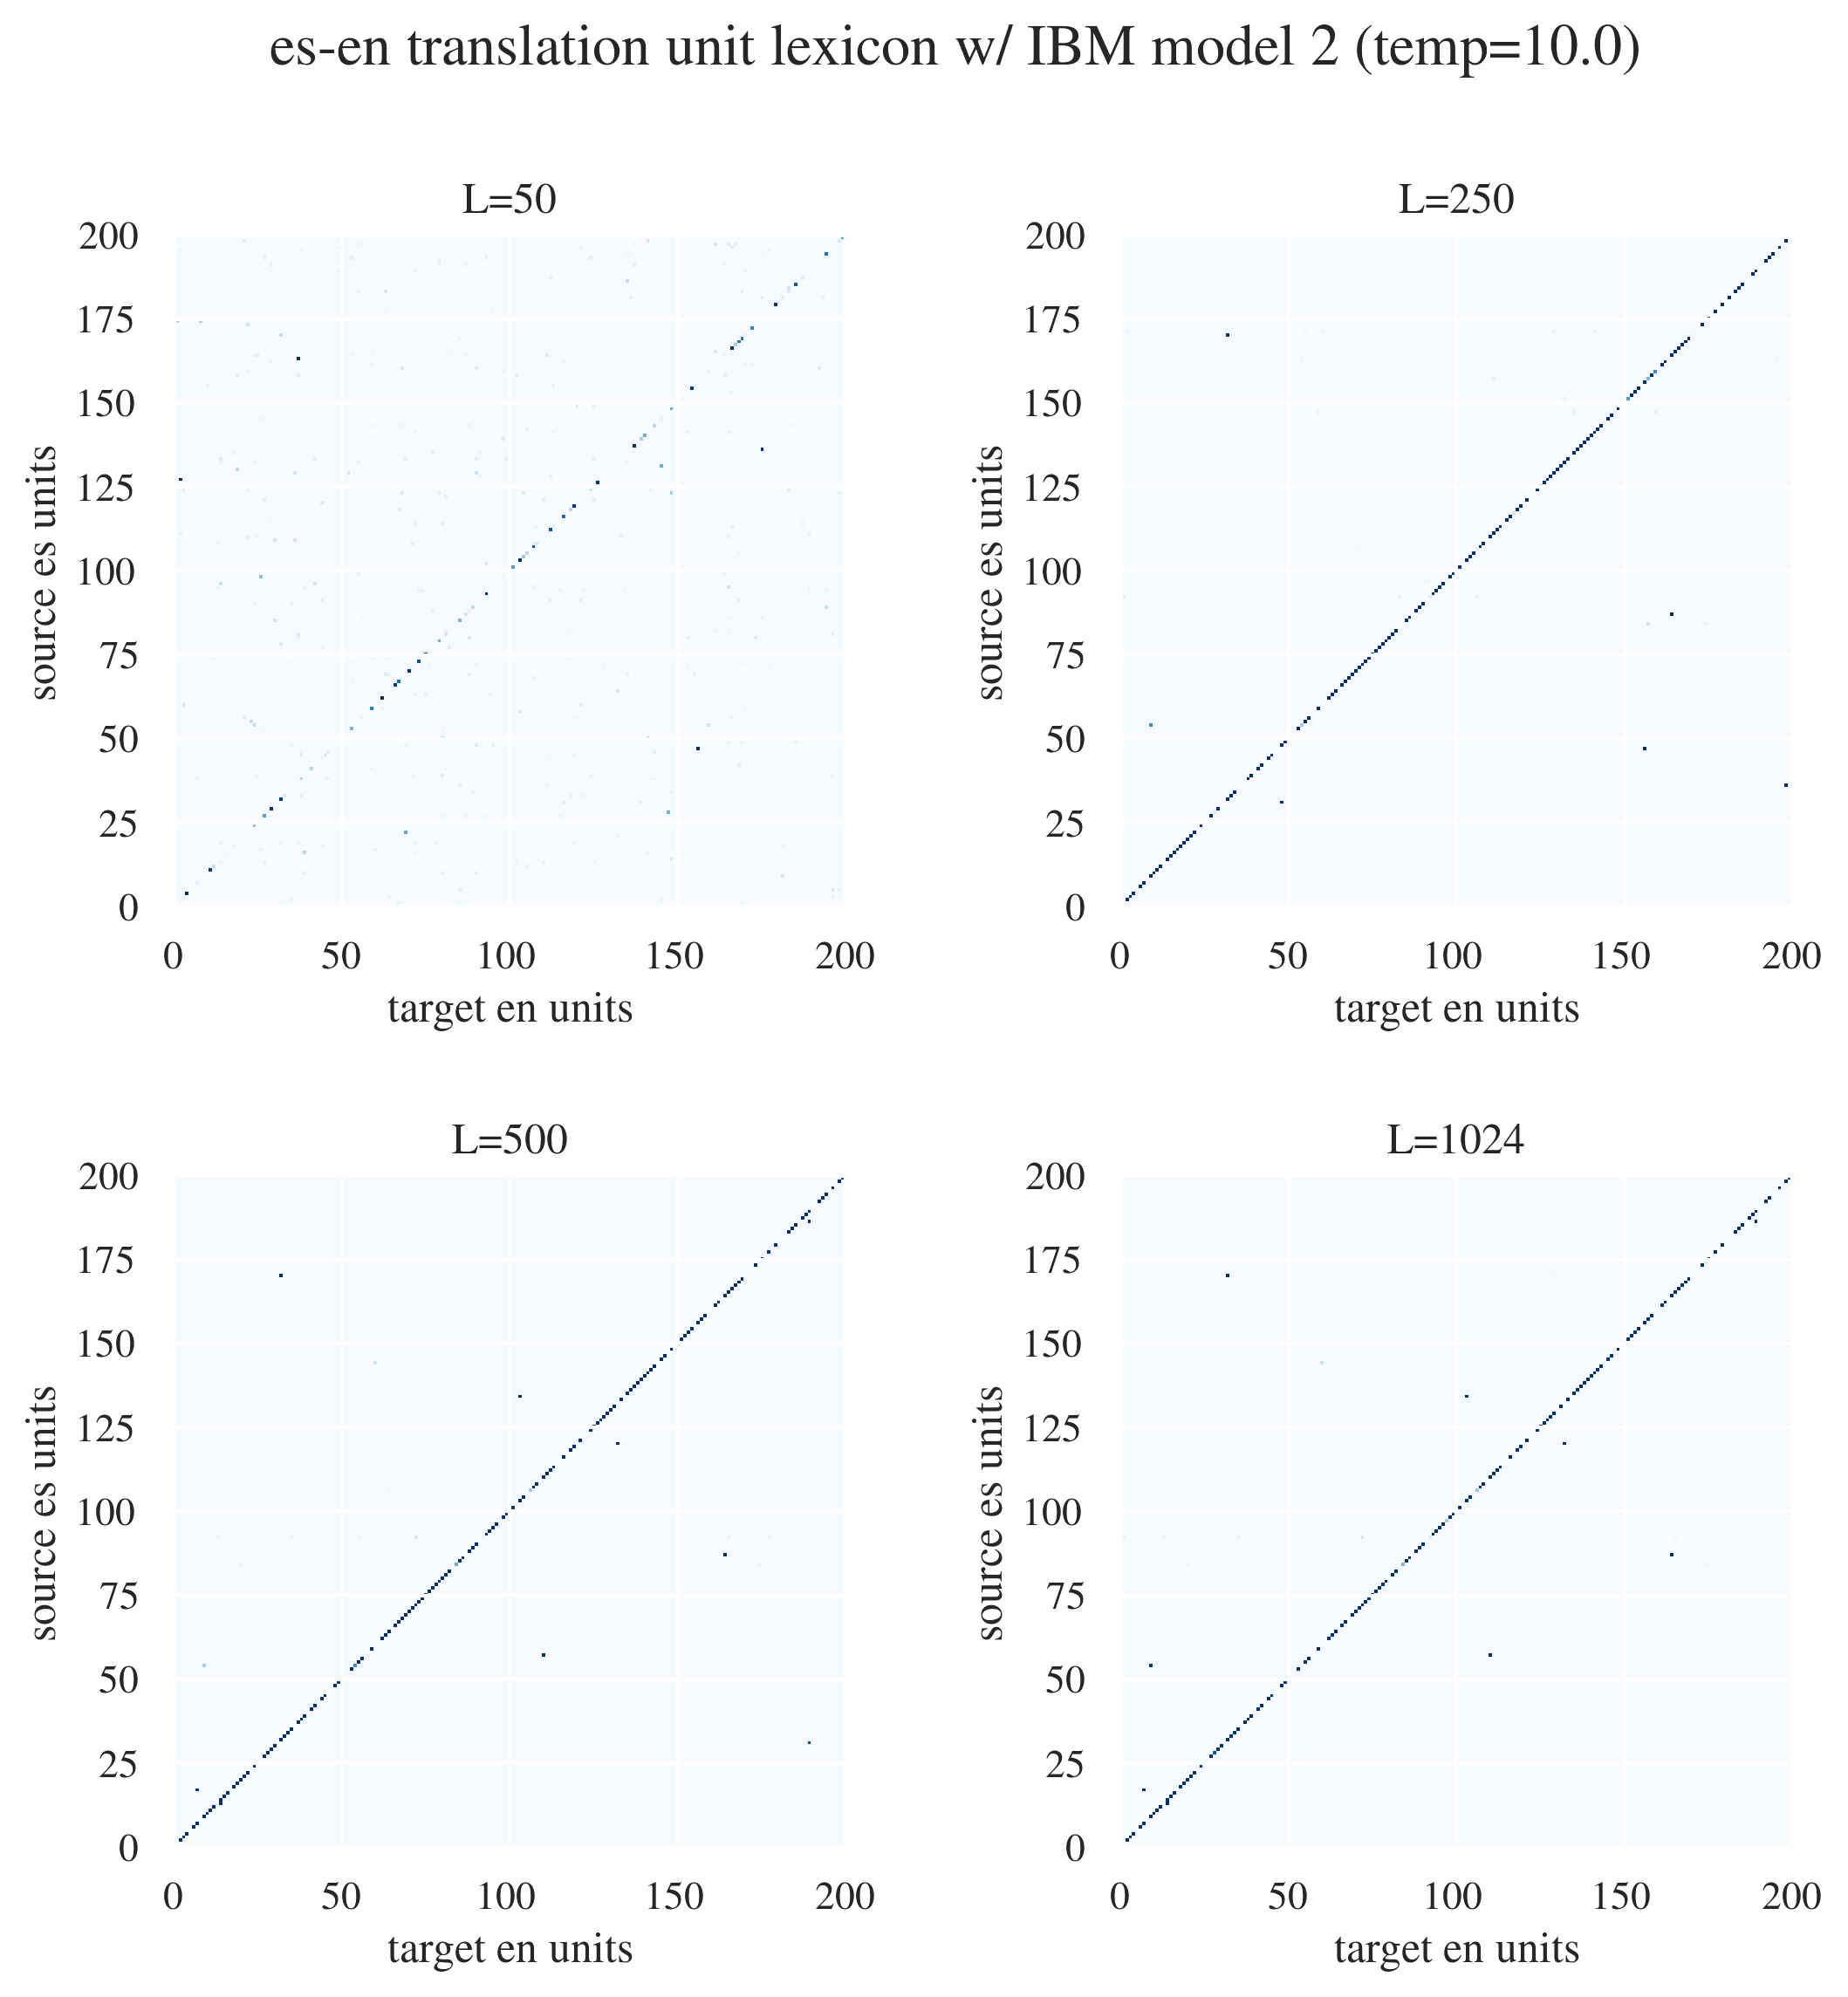

In [115]:
# threshold the lexicon 
start = 0
end = 200

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))

# Plot each array in a different subplot
axs[0, 0].imshow(es_en_lexicon_l50_t100[start:end, start:end], cmap='Blues', interpolation='nearest')
axs[0, 1].imshow(es_en_lexicon_l250_t100[start:end, start:end], cmap='Blues', interpolation='nearest')
axs[1, 0].imshow(es_en_lexicon_l500_t100[start:end, start:end], cmap='Blues', interpolation='nearest')
axs[1, 1].imshow(es_en_lexicon_l1024_t100[start:end, start:end], cmap='Blues', interpolation='nearest')

# Add a colorbar to each subplot
axs[0, 0].set_title("L=50")
axs[0, 1].set_title("L=250")
axs[1, 0].set_title("L=500")
axs[1, 1].set_title("L=1024")

# Set x and y axis labels and limits for each subplot
for ax in axs.flat:
    ax.set_xlabel('target en units')
    ax.set_ylabel('source es units')
    ax.set_xlim(start, end)
    ax.set_ylim(start, end)
    
# Add a general title to the entire figure
fig.suptitle("es-en translation unit lexicon w/ IBM model 2 (temp=10.0)", fontsize=16)

# Adjust the spacing between the subplots
fig.subplots_adjust(wspace=0.4, hspace=0.4)

# Show the plot
plt.show()

fig.savefig("/data/sls/scratch/clai24/lexicon/exp/ibm2_lexicon_alignment/viz/es-en/ibm_model2_t10.0.png")

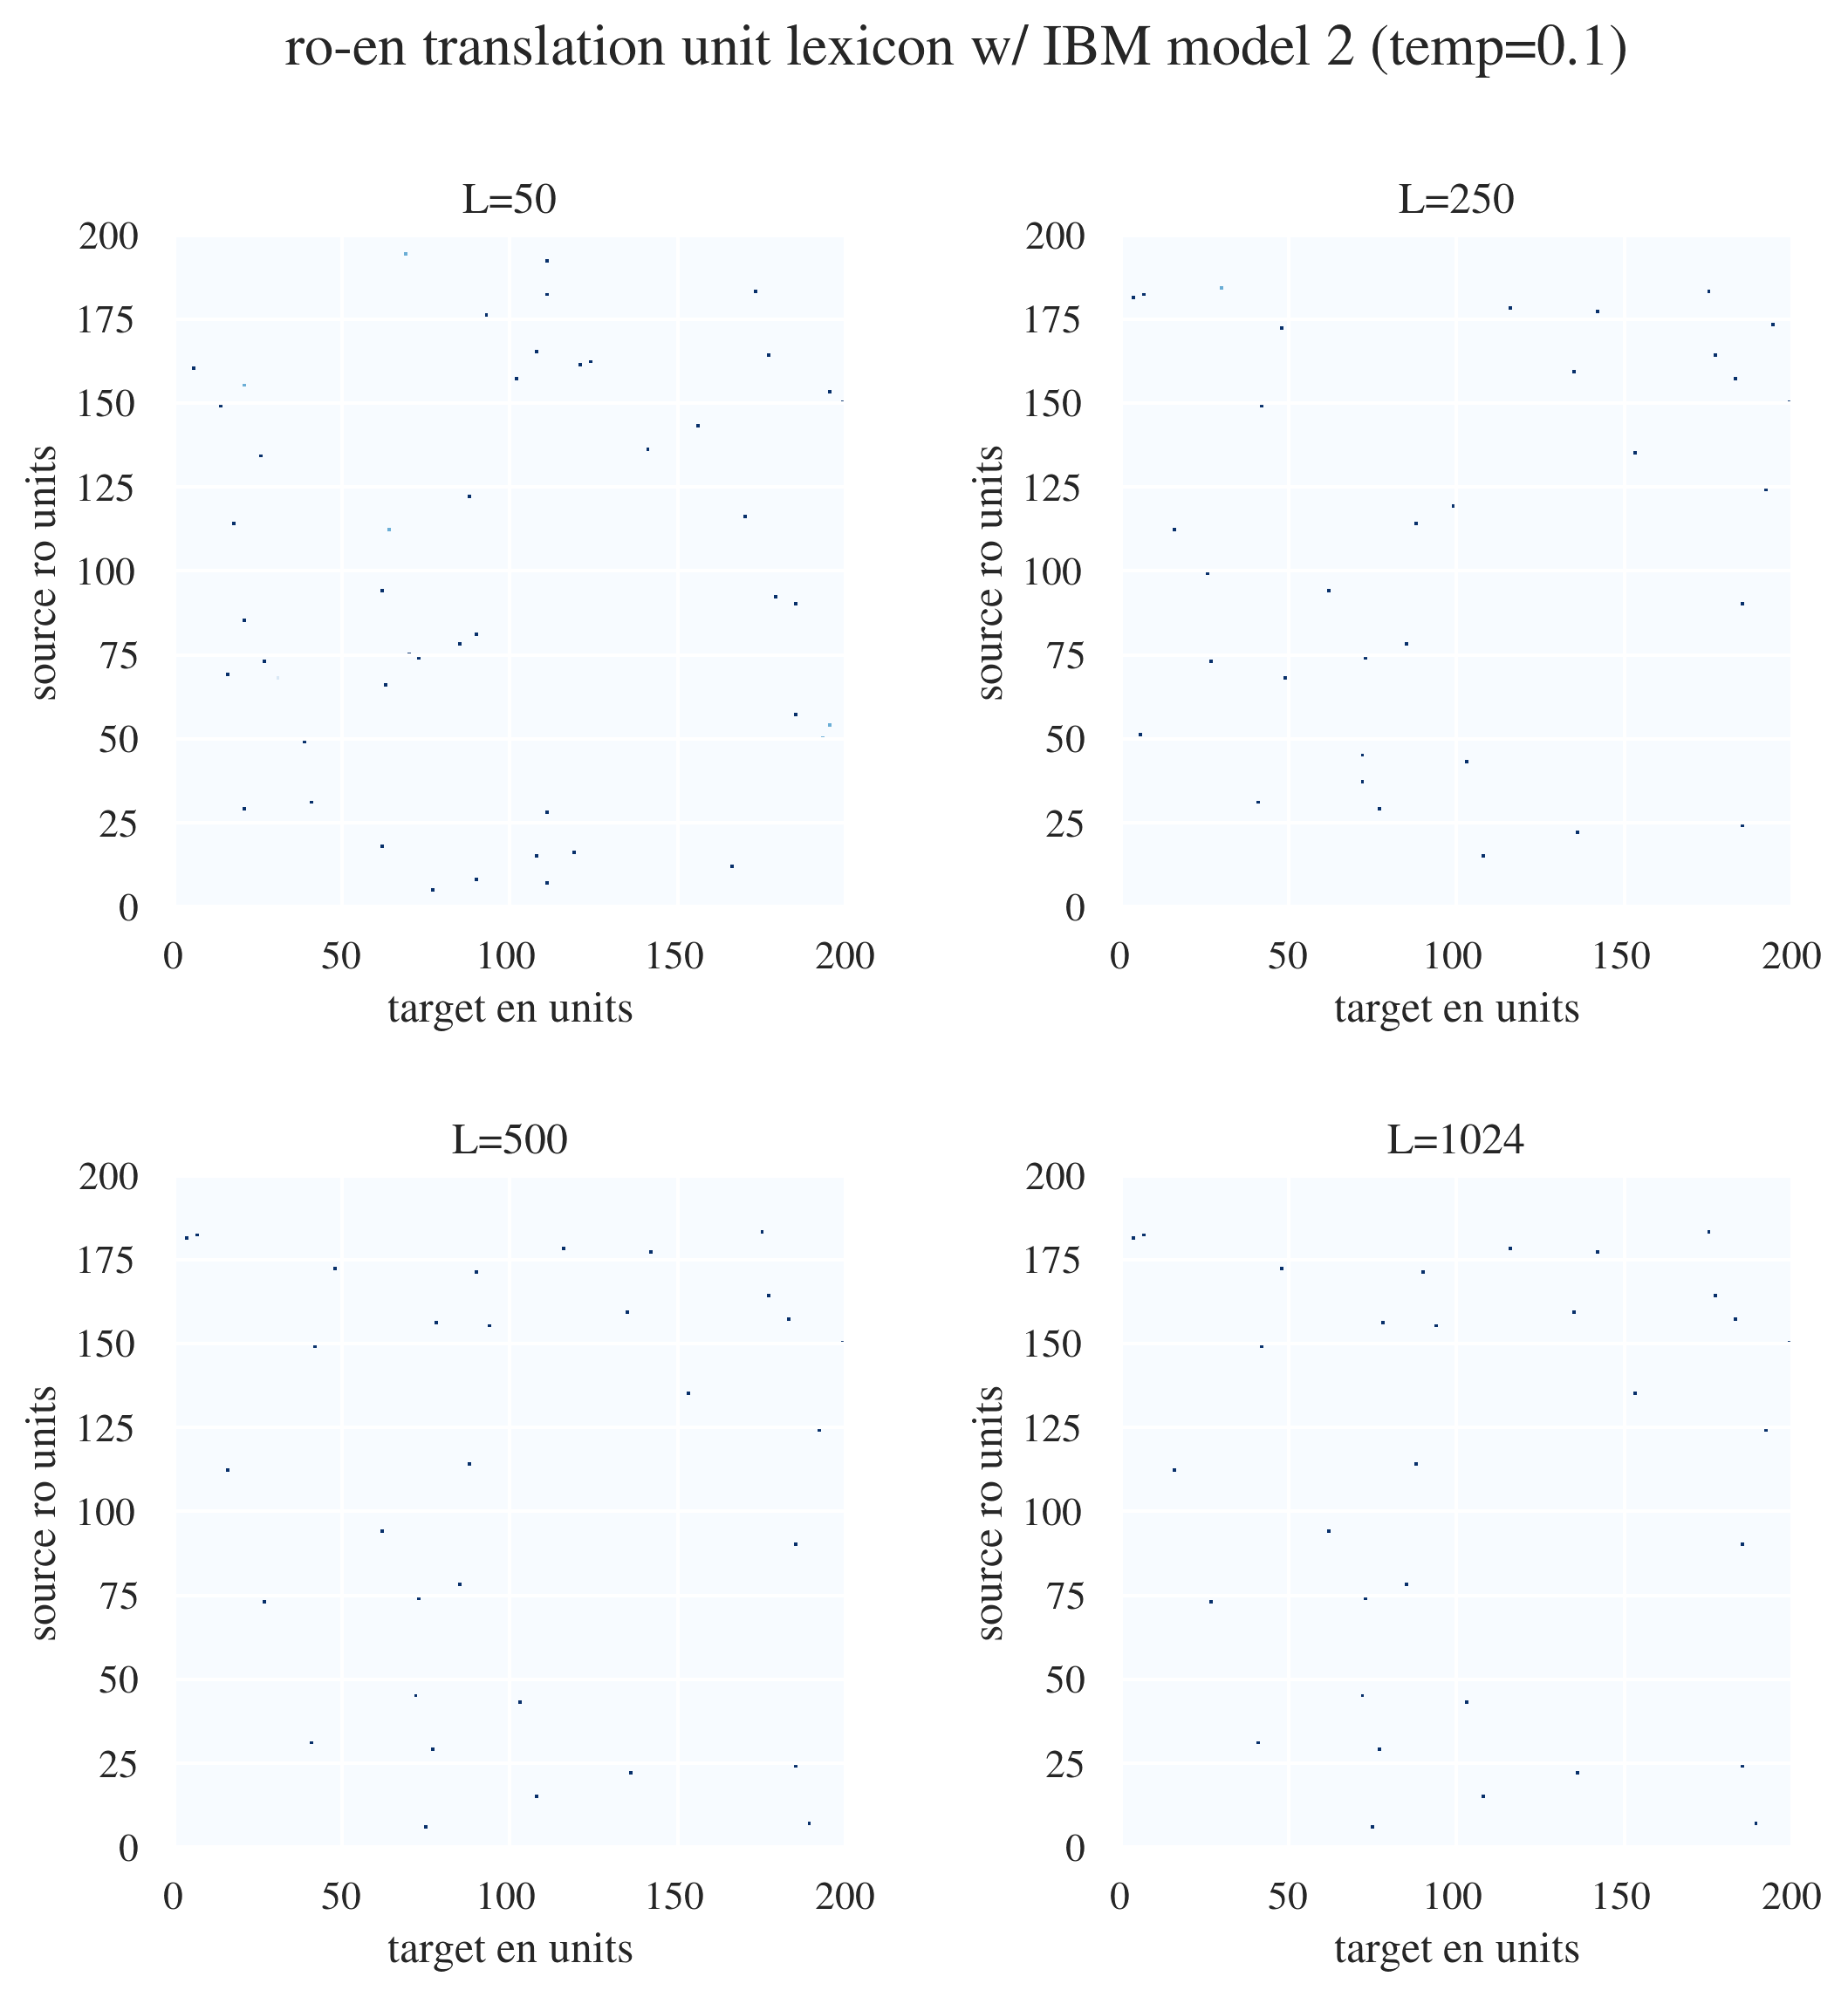

In [118]:
# threshold the lexicon 
start = 0
end = 200

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))

# Plot each array in a different subplot
axs[0, 0].imshow(ro_en_lexicon_l50_t01[start:end, start:end], cmap='Blues', interpolation='nearest')
axs[0, 1].imshow(ro_en_lexicon_l250_t01[start:end, start:end], cmap='Blues', interpolation='nearest')
axs[1, 0].imshow(ro_en_lexicon_l500_t01[start:end, start:end], cmap='Blues', interpolation='nearest')
axs[1, 1].imshow(ro_en_lexicon_l1024_t01[start:end, start:end], cmap='Blues', interpolation='nearest')

# Add a colorbar to each subplot
axs[0, 0].set_title("L=50")
axs[0, 1].set_title("L=250")
axs[1, 0].set_title("L=500")
axs[1, 1].set_title("L=1024")

# Set x and y axis labels and limits for each subplot
for ax in axs.flat:
    ax.set_xlabel('target en units')
    ax.set_ylabel('source ro units')
    ax.set_xlim(start, end)
    ax.set_ylim(start, end)
    
# Add a general title to the entire figure
fig.suptitle("ro-en translation unit lexicon w/ IBM model 2 (temp=0.1)", fontsize=16)

# Adjust the spacing between the subplots
fig.subplots_adjust(wspace=0.4, hspace=0.4)

# Show the plot
plt.show()

fig.savefig("/data/sls/scratch/clai24/lexicon/exp/ibm2_lexicon_alignment/viz/ro-en/ibm_model2_t0.1.png")